In [17]:
import pandas as pd
import matplotlib.pyplot as plt

In [42]:
df1 = pd.read_csv("../../Data/DailyTotalFemaleBirths.csv" , index_col="Date" , parse_dates=True)
df1.index.freq = pd.infer_freq(df1.index)
df1.head()

,Births
Date,
1959-01-01,35
1959-01-02,32
1959-01-03,30
1959-01-04,31
1959-01-05,44


In [16]:
df2 = pd.read_csv("../../Data/TradeInventories.csv" , index_col="Date" , parse_dates=True)
df2.index.freq = pd.infer_freq(df2.index)
df2.head()

,Inventories
Date,
1997-01-01,1301161
1997-02-01,1307080
1997-03-01,1303978
1997-04-01,1319740
1997-05-01,1327294


Visualize

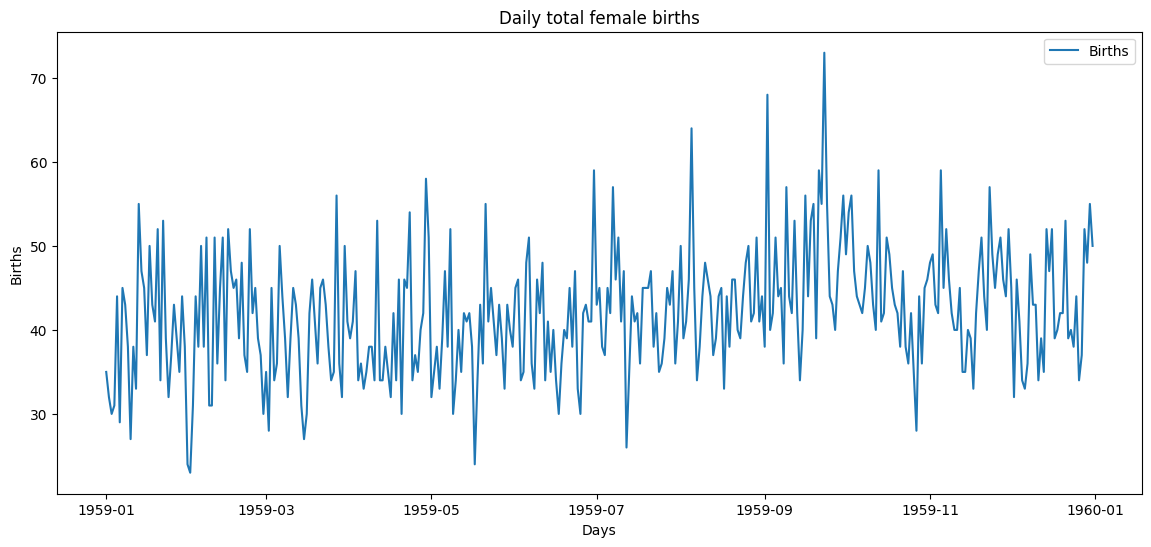

In [43]:
plt.figure(figsize=(14, 6))

# Plotting three separate line graphs
plt.plot(df1.index, df1["Births"], label='Births')

# Adding labels and title
plt.xlabel('Days')
plt.ylabel('Births')
plt.title('Daily total female births')

plt.legend()
plt.show()

Check Stationarity with ADF

In [37]:
from statsmodels.tsa.stattools import adfuller

def isStationary(data):
    result = adfuller(data.dropna() , autolag='AIC')
    if result[1]>0.05:
        print("not stationary")
    else:
        print("stationary")

In [38]:
isStationary(df1['Births'])

stationary


Split Data

In [44]:
import math 
train_len =math.ceil(len(df1)*0.8)
df1_train = df1['Births'].iloc[:train_len]
df1_test = df1['Births'].iloc[train_len-1:]

Determine p,q,d values 

In [47]:
from pmdarima import auto_arima 

model = auto_arima(
    df1['Births'] , 
    seasonal=False , 
    # stationary=True , 
    trace=True , 
)

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=2463.018, Time=0.54 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=2650.760, Time=0.01 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=2565.234, Time=0.03 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=2463.584, Time=0.05 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=2648.768, Time=0.01 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.42 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=2461.271, Time=0.35 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=2460.154, Time=0.14 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=2460.722, Time=0.11 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=2536.154, Time=0.06 sec
 ARIMA(1,1,1)(0,0,0)[0]             : AIC=2459.074, Time=0.04 sec
 ARIMA(0,1,1)(0,0,0)[0]             : AIC=2462.221, Time=0.02 sec
 ARIMA(1,1,0)(0,0,0)[0]             : AIC=2563.261, Time=0.23 sec
 ARIMA(2,1,1)(0,0,0)[0]             : AIC=2460.367, Time=0.08 sec
 ARIMA(1,1,2)(0,0,0)[0]             : 

In [48]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                  365
Model:               SARIMAX(1, 1, 1)   Log Likelihood               -1226.537
Date:                Fri, 29 Mar 2024   AIC                           2459.074
Time:                        21:08:22   BIC                           2470.766
Sample:                    01-01-1959   HQIC                          2463.721
                         - 12-31-1959                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.1252      0.060      2.097      0.036       0.008       0.242
ma.L1         -0.9624      0.017    -56.429      0.000      -0.996      -0.929
sigma2        49.1512      3.250     15.122      0.000      42.781      55.522
===================================================================================
Ljung-Box (L1) (Q):                   0.04   Jarque-Bera (JB):                25.33
Prob(Q):                              0.84   Prob(JB):                         0.00
Heteroskedasticity (H):               0.96   Skew:                             0.57
Prob(H) (two-sided):                  0.81   Kurtosis:                         3.60
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [51]:
from  statsmodels.tsa.arima.model import ARIMA

df1_model = ARIMA(df1_train , order=(1,1,1)).fit()

In [52]:
print(df1_model.summary())

                               SARIMAX Results                                
Dep. Variable:                 Births   No. Observations:                  292
Model:                 ARIMA(1, 1, 1)   Log Likelihood                -985.074
Date:                Fri, 29 Mar 2024   AIC                           1976.149
Time:                        21:22:09   BIC                           1987.169
Sample:                    01-01-1959   HQIC                          1980.563
                         - 10-19-1959                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.0734      0.066      1.116      0.264      -0.056       0.202
ma.L1         -0.9563      0.021    -45.604      0.000      -0.997      -0.915
sigma2        50.6241      3.667     13.804      0.0

In [58]:
forecast = df1_model.forecast(steps=60)


In [59]:
df1["forecast"]=forecast

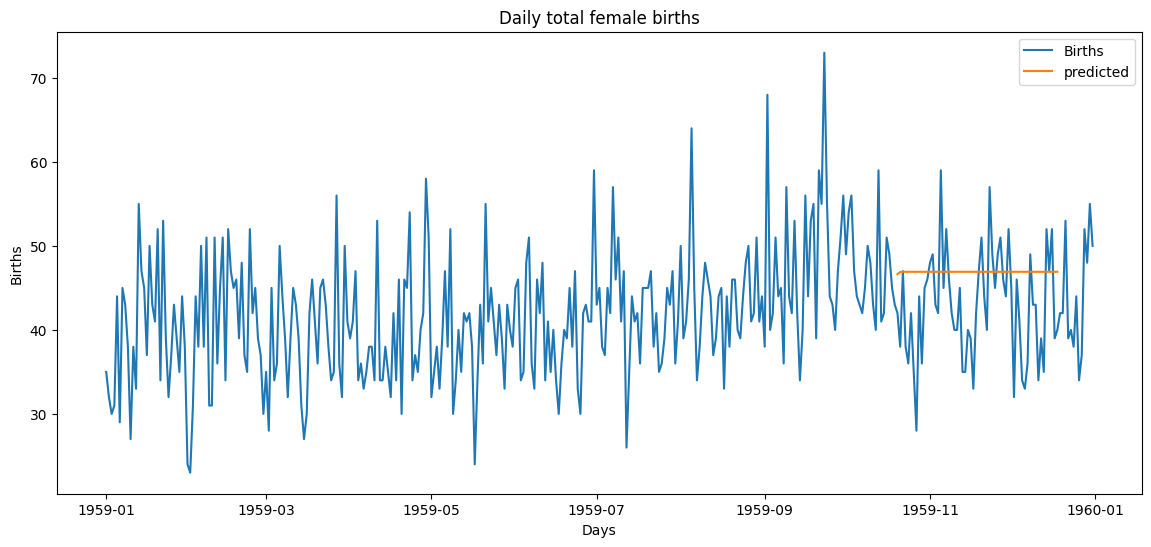

In [60]:
plt.figure(figsize=(14, 6))

# Plotting three separate line graphs
plt.plot(df1.index, df1["Births"], label='Births')
plt.plot(df1.index, df1["forecast"], label='predicted')

# Adding labels and title
plt.xlabel('Days')
plt.ylabel('Births')
plt.title('Daily total female births')

plt.legend()
plt.show()